,Tiempo en s,Aceleración Sismica en g,Respuesta en Desplazamiento,Respuesta en velocidad,Respuesta en aceleración
0,0.00,1.0000,0.000000e+00,0.000000,-0.000000
1,0.00,1.1904,0.000000e+00,0.000000,-0.001575
2,0.01,1.1904,-7.874620e-08,-0.000008,-0.001822
3,0.02,1.1904,-2.485715e-07,-0.000017,-0.001662
4,0.03,1.1904,-5.014831e-07,-0.000025,-0.001145
...,...,...,...,...,...
1497,14.96,0.0000,1.187952e-03,-0.016096,-0.370390
1498,14.97,0.0000,1.008476e-03,-0.017948,-0.314452
1499,14.98,0.0000,8.132774e-04,-0.019520,-0.254798
1500,14.99,0.0000,6.053388e-04,-0.020794,-0.189976


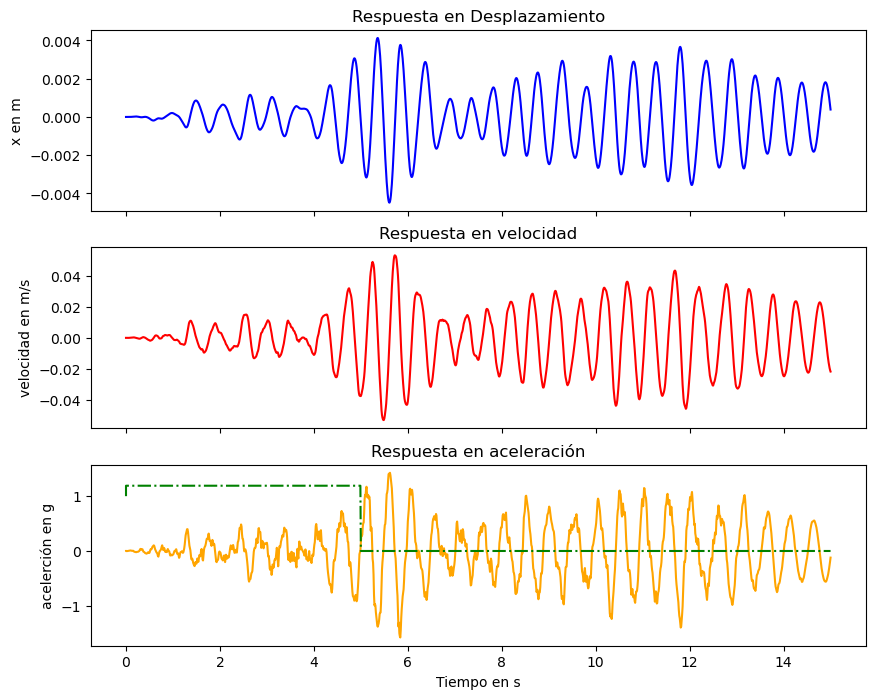

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BNewmark_DS_GR2_2023_02 as BN


Sismo_direccion = './Sismos/Artificial.AT2' #1
Sismo_const_direccion = './Sismos/Sg2_data.AT2' #2

# Initialize an empty list to store the data
data_list1 = []
data_list2 = []

with open(Sismo_direccion, 'r') as file1:
    for line in file1:
        # Split the line into values (assuming they are separated by spaces)
        values1 = line.strip().split()
        # Convert the values to float and append them to the data list
        data_list1.extend([float(value) for value in values1])

with open(Sismo_const_direccion, 'r') as file2:
    for line in file2:
        values2 = line.strip().split()
        data_list2.extend([float(value) for value in values2])

# Convert the data list into a NumPy array and reshape it
Sismo = np.array(data_list1).reshape(1502,2)
Sismo_const = np.array(data_list2).reshape(1502,2)
Sismo_const = Sismo_const[:1502, :]

tbl_Sismo = pd.DataFrame(Sismo)
tbl_Sismo_const = pd.DataFrame(Sismo_const)

# display(tbl_Sismo)
# display(tbl_Sismo_const)


zi = 0
numcol = 9
E = 2000000
I = (0.3**4)/12
L = 3.6
peso = 2*(64*(0.2+0.22+0.35))
k = numcol*(12*E*I/(L**3))
m = peso/9.81
w = np.sqrt(k/m)
T = 2*np.pi/w

Results_sismo = BN.BNewmark_DS_GR2_2023_02(Sismo, zi, T, m, w)
Results_sismo_const = BN.BNewmark_DS_GR2_2023_02(Sismo_const, zi, T, m, w)

xn1, xvn1, xan1 = Results_sismo.BNewmark()
xn1c, xvn1c, xan1c = Results_sismo_const.BNewmark()

#Tablas
Resul = pd.DataFrame({ 'Tiempo en s': Sismo_const[:,0], 'Aceleración Sismica en g': Sismo_const[:,1], 'Respuesta en Desplazamiento': xn1, 'Respuesta en velocidad': xvn1, 'Respuesta en aceleración': xan1})
display(Resul)


#Graficos
fig, (ax1, ax2, ax3) =plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(Sismo_const[:,0], xn1, label='xn1', color='blue')
ax1.set_ylabel('x en m')
ax1.set_title('Respuesta en Desplazamiento')

ax2.plot(Sismo_const[:,0], xvn1, label='xvn1', color='red')
ax2.set_ylabel('velocidad en m/s')
ax2.set_title('Respuesta en velocidad')

ax3.plot(Sismo_const[:,0], xan1, label='xan1', color='orange')
ax3.plot(Sismo_const[:,0], Sismo_const[:,1], label='Sg2', color='green', linestyle='-.')
ax3.set_ylabel('acelerción en g')
ax3.set_xlabel('Tiempo en s')
ax3.set_title('Respuesta en aceleración')

# plt.xlim(0, 1)
plt.show()
